In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
drive = '/content/drive/MyDrive/Colab Notebooks/'

Mounted at /content/drive/


# Loading the Dataset
Load the dataset and change name to Tencent

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tencent.csv')
dataset['name'] = ['Tencent']*len(dataset)
dataset.shape

(493, 8)

In [ ]:
training_set = dataset.iloc[:, 3:4].values

training_set[:4]

array([[485.053],
       [501.553],
       [505.435],
       [500.582]])

# Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(training_set)
data[0, 0]

0.41457156696094

# Training Set

We train in the previous 40 prices fo the stock

In [ ]:
n = len(data)
X_train = []
y_train = []
for i in range(40, n):
  X_train.append(data[i-40:i, 0])
  y_train.append(data[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)


Now we reshape the training set to a 3d array to feed the model

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train. shape

(453, 40, 1)

# Building the Model

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train. shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout (0.2))
regressor.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 0.1104
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0256
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0155
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0119
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0099
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0091
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0101
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0112
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - loss: 0.0091
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.0108
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0087
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0093
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0073
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0065
Epoch 15/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step -

In [ ]:
dataset_test = pd.read_csv ("/content/drive/MyDrive/Colab Notebooks/Tencent.csv")
actual_stock_price = dataset_test.iloc[:,3:4].values


In [ ]:
dataset_total = pd.concat((dataset['open'], dataset_test['open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-40:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range (40,n):
  X_test.append(inputs [i-40:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform (predicted_stock_price)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


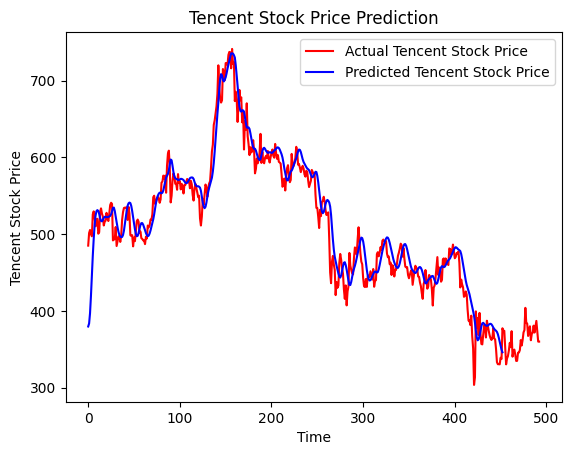

In [ ]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Tencent Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Tencent Stock Price')
plt.title('Tencent Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tencent Stock Price')
plt.legend()